In [934]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

Step1 Reading the data

In [827]:
df=pd.read_csv("C:\\doc\\day.csv")
df.head(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,06-04-2018,2,0,4,0,3,1,1,16.024153,19.38040,47.0833,17.625221,413,2395,2808
96,97,07-04-2018,2,0,4,0,4,1,1,17.937500,21.68480,60.2917,10.874904,571,2570,3141
97,98,08-04-2018,2,0,4,0,5,1,2,13.769153,16.22395,83.6250,15.208464,172,1299,1471
98,99,09-04-2018,2,0,4,0,6,0,2,14.042500,17.07645,87.7500,8.916561,879,1576,2455


In [828]:
df.shape

(730, 16)

In [829]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [830]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [831]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#dropping the column registered

In [833]:
df=df.drop('registered',axis=1)

In [834]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1600


Dropping the column casual

In [836]:
df=df.drop('casual',axis=1)

In [837]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Dropping the column dteday

In [839]:
df=df.drop('dteday',axis=1)

In [840]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [841]:
df=df.drop('instant',axis=1)

In [842]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [843]:
df=df.drop('weekday',axis=1)

In [844]:
df.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [845]:
df=df.drop('mnth',axis=1)

In [846]:
df.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600


Step2 Visualizing the data

Univariate analysis- box plot

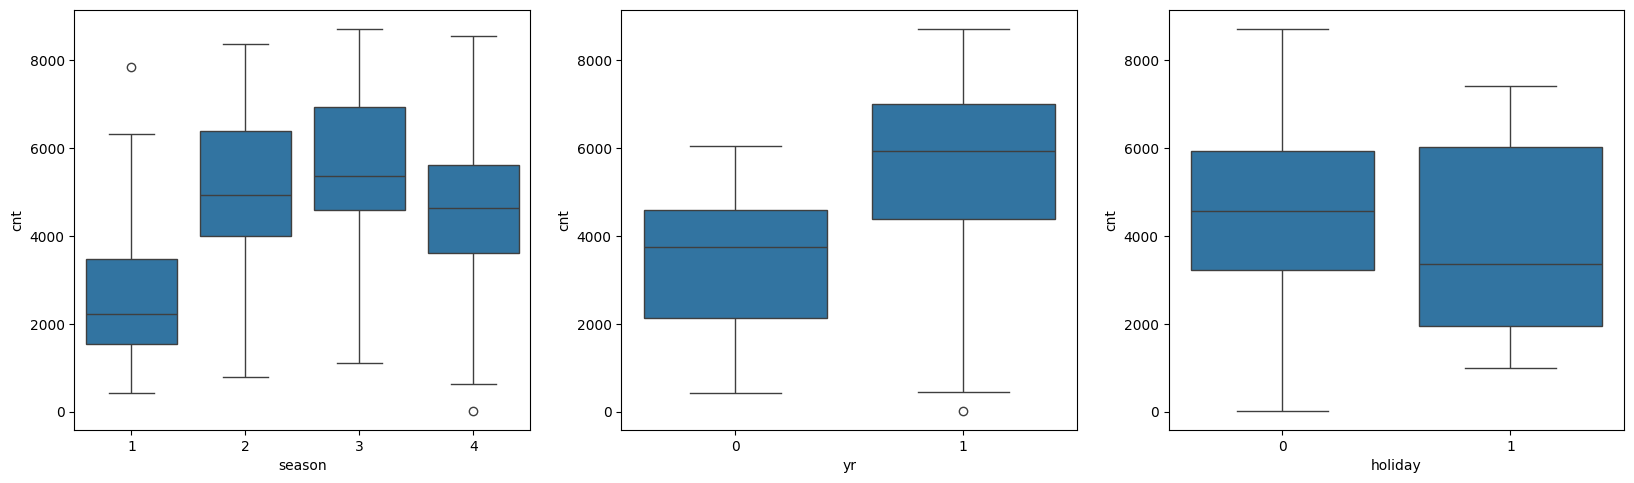

In [849]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

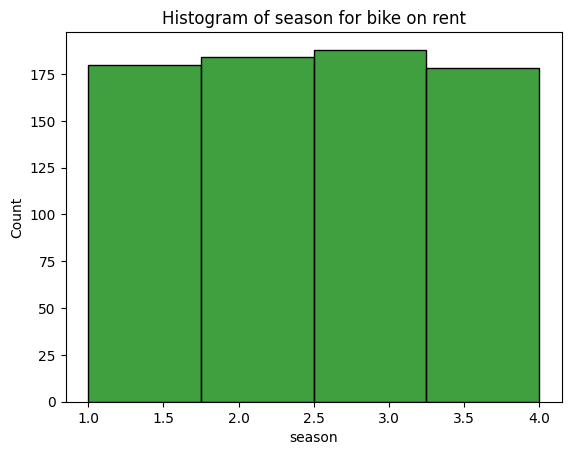

In [850]:
sns.histplot(df['season'], bins=4, color='green', edgecolor='black', kde=False)

# Adding labels and title
plt.xlabel('season')
plt.ylabel('Count')
plt.title('Histogram of season for bike on rent')

# Show the plot
plt.show()

In [851]:
df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

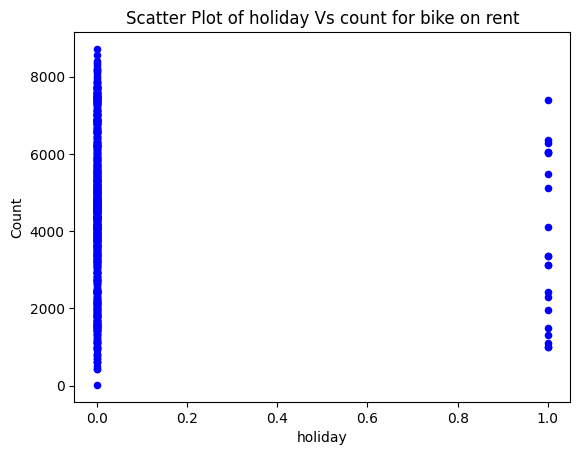

In [852]:
df.plot(kind='scatter', x='holiday', y='cnt', color='blue')
plt.xlabel('holiday')
plt.ylabel('Count')
plt.title('Scatter Plot of holiday Vs count for bike on rent')
plt.show()

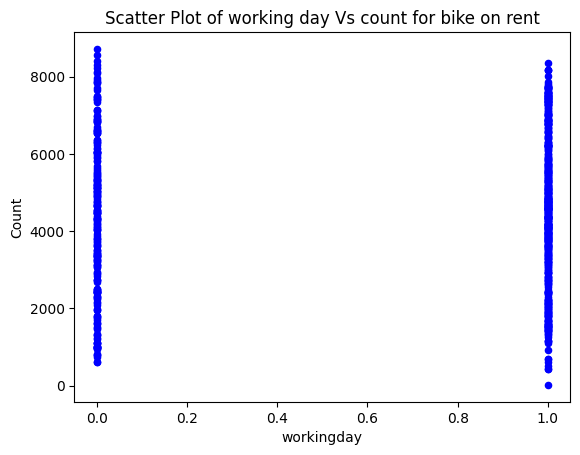

In [853]:
df.plot(kind='scatter', x='workingday', y='cnt', color='blue')
plt.xlabel('workingday')
plt.ylabel('Count')
plt.title('Scatter Plot of working day Vs count for bike on rent')
plt.show()

In [854]:
df.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

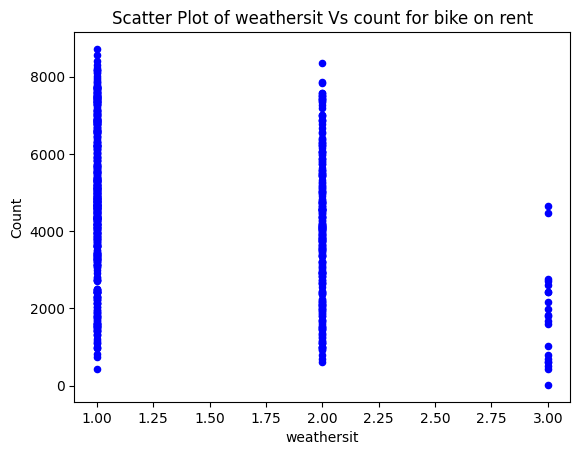

In [855]:
df.plot(kind='scatter', x='weathersit', y='cnt', color='blue')
plt.xlabel('weathersit')
plt.ylabel('Count')
plt.title('Scatter Plot of weathersit Vs count for bike on rent')
plt.show()

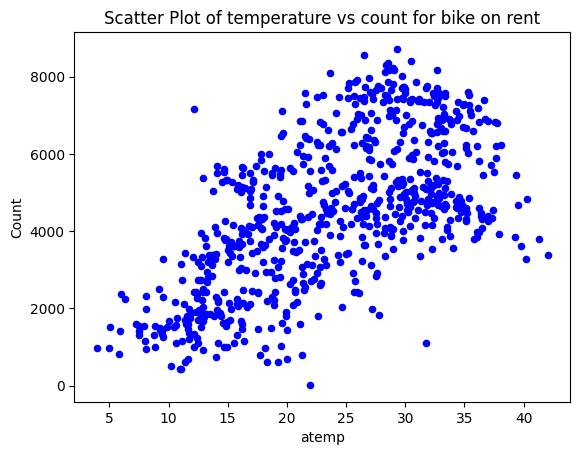

In [856]:
df.plot(kind='scatter', x='atemp', y='cnt', color='blue')
plt.xlabel('atemp')
plt.ylabel('Count')
plt.title('Scatter Plot of temperature vs count for bike on rent')
plt.show()

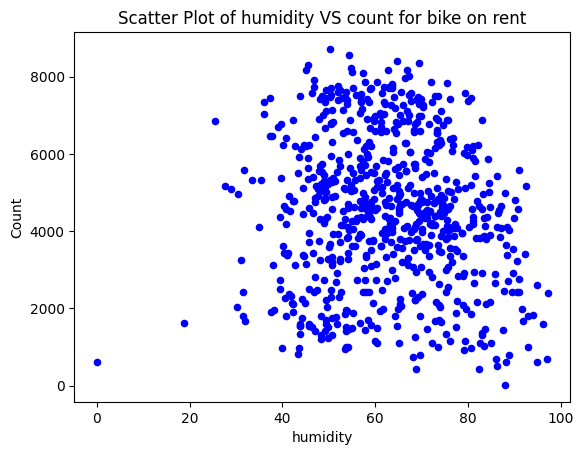

In [857]:
df.plot(kind='scatter', x='hum', y='cnt', color='blue')
plt.xlabel('humidity')
plt.ylabel('Count')
plt.title('Scatter Plot of humidity VS count for bike on rent')
plt.show()

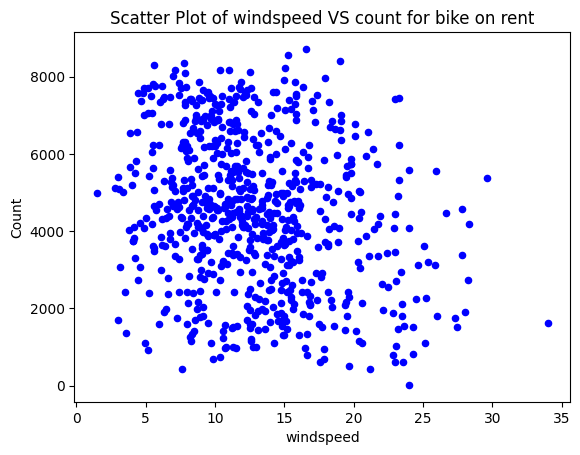

In [858]:
df.plot(kind='scatter', x='windspeed', y='cnt', color='blue')
plt.xlabel('windspeed')
plt.ylabel('Count')
plt.title('Scatter Plot of windspeed VS count for bike on rent')
plt.show()

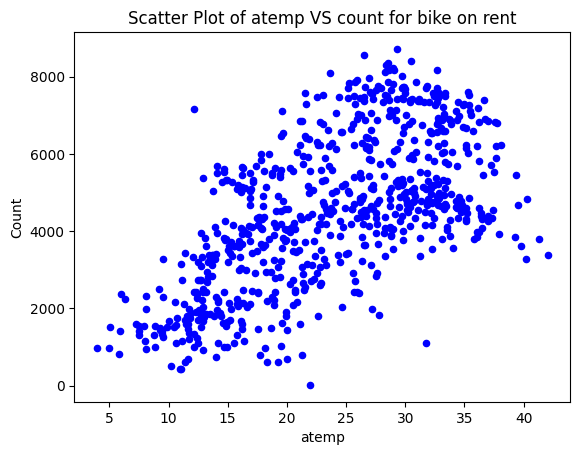

In [859]:
df.plot(kind='scatter', x='atemp', y='cnt', color='blue')
plt.xlabel('atemp')
plt.ylabel('Count')
plt.title('Scatter Plot of atemp VS count for bike on rent')
plt.show()

Step3 Data Preparation

Creating dummy variables for weathersit column

In [862]:
df1= pd.get_dummies(df['weathersit'],prefix='weathersit').astype(int)
df1.head()

,weathersit_1,weathersit_2,weathersit_3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Concatinating the df1 dataframe to original dataframe df

In [864]:
df = pd.concat([df, df1], axis = 1)

In [865]:
df.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3
0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,1,0
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,1,0
2,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,1,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,1,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


Dropping the original weathersit column as new dummy variable column is created for weathersit

In [867]:
df=df.drop('weathersit',axis=1)

In [868]:
df.head()

,season,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0
2,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,1,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [869]:
def newseason(x):
    if x==1:
        return 'spring'
    if x==2: 
        return 'summer'
    if x==3: 
        return 'fall'
    else:
         return 'winter'
df['season_categorical'] = df['season'].apply(newseason)

In [870]:
df['season_categorical'].head(100)

0     spring
1     spring
2     spring
3     spring
4     spring
       ...  
95    summer
96    summer
97    summer
98    summer
99    summer
Name: season_categorical, Length: 100, dtype: object

In [871]:
df2= pd.get_dummies(df['season_categorical'],prefix='season').astype(int)
df2.head()

,season_fall,season_spring,season_summer,season_winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [872]:
df2=df2.drop(columns=df2.columns[-1])
df2.head()

,season_fall,season_spring,season_summer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [873]:
df = pd.concat([df, df2], axis = 1)

In [874]:
df.head()

,season,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,season_categorical,season_fall,season_spring,season_summer
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,spring,0,1,0
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,spring,0,1,0
2,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,spring,0,1,0
3,1,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,spring,0,1,0
4,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,spring,0,1,0


In [875]:
df=df.drop('season',axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,season_categorical,season_fall,season_spring,season_summer
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,spring,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,spring,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,spring,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,spring,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,spring,0,1,0


In [876]:
df=df.drop('season_categorical',axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,season_fall,season_spring,season_summer
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0


Splitting to train dataset and test dataset

In [878]:
df_train,df_test=train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 14)
(220, 14)


Rescaling the feature

In [880]:
scaler=MinMaxScaler()

In [881]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [882]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,season_fall,season_spring,season_summer
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,1


To get the correlation plot the heatmap

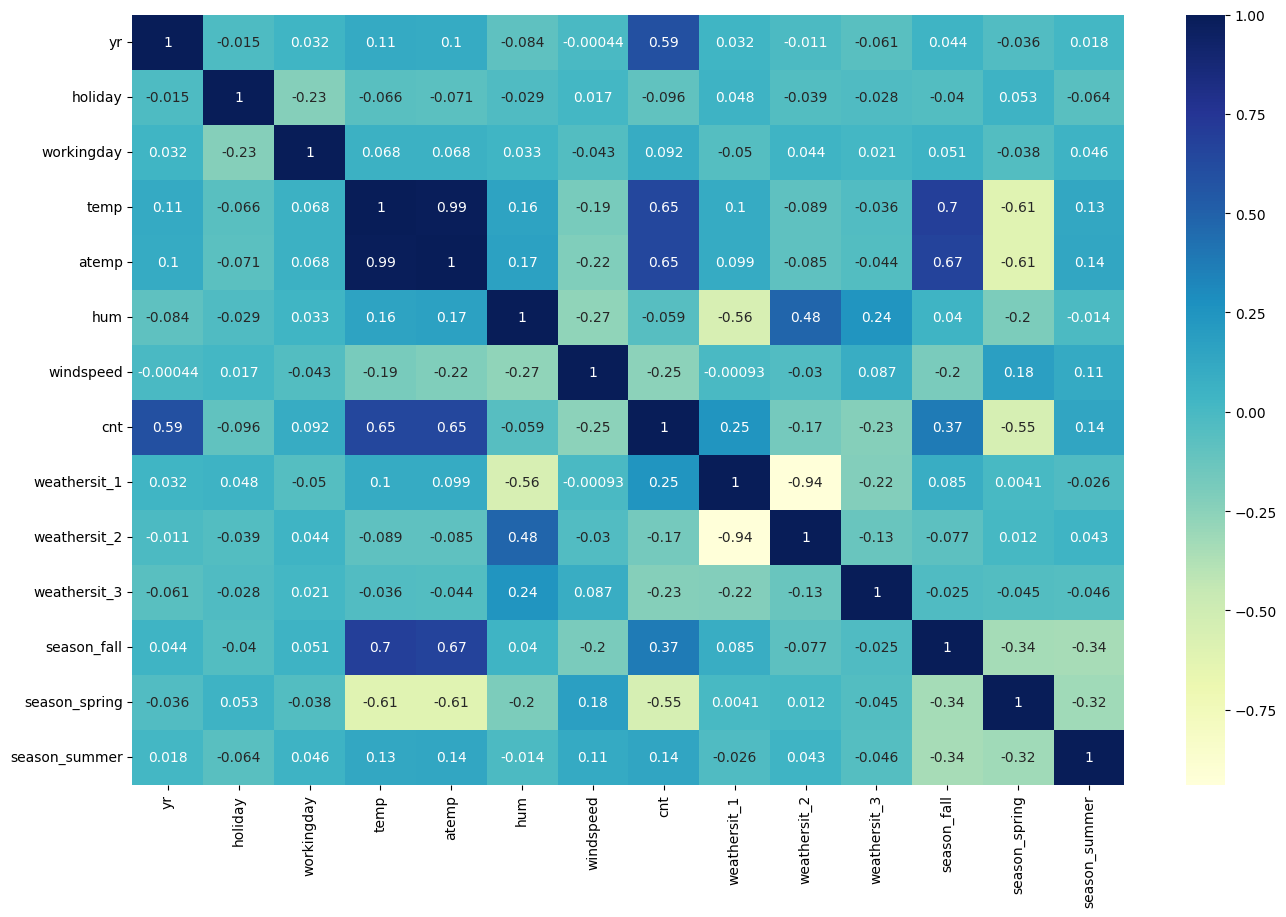

In [884]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Dividing into x_train and y_train

In [886]:
y_train = df_train.pop('cnt')
X_train = df_train
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'season_fall',
       'season_spring', 'season_summer'],
      dtype='object')

In [887]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [888]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          3.27e-181
Time:                        20:24:39   Log-Likelihood:                 487.84
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     497   BIC:                            -894.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2028      0.027      7.506      0.000       0.150       0.256
yr                0.2303      0.008     27.164      0.000       0.214       0.247
holiday          -0.0741      0.027     -2.712      0.007      -0.128      -0.020
workingday        0.0174      0.009      1.889      0.059      -0.001       0.036
temp              0.4622      0.141      3.289      0.001       0.186       0.738
atemp             0.0345      0.144      0.240      0.810      -0.248       0.317
hum              -0.1402      0.039     -3.583      0.000      -0.217      -0.063
windspeed        -0.1797      0.027     -6.561      0.000      -0.234      -0.126
weathersit_1      0.1655      0.010     17.419      0.000       0.147       0.184
weathersit_2      0.1126      0.012      9.110      0.000       0.088       0.137
weathersit_3     -0.0754      0.023     -3.301      0.001      -0.120      -0.031
season_fall      -0.0872      0.017     -5.037      0.000      -0.121      -0.053
season_spring    -0.1624      0.013    -12.283      0.000      -0.188      -0.136
season_summer    -0.0449      0.013     -3.411      0.001      -0.071      -0.019
==============================================================================
Omnibus:                       60.126   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.688
Skew:                          -0.578   Prob(JB):                     2.85e-36
Kurtosis:                       5.523   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [889]:
vif=pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
3,temp,57.83
4,atemp,53.42
7,weathersit_1,35.07
8,weathersit_2,25.84
9,weathersit_3,3.61
10,season_fall,3.34
5,hum,1.87
12,season_summer,1.86
11,season_spring,1.85
6,windspeed,1.24


In [890]:
X=X_train.drop('temp', axis=1)

In [891]:
# Add a constant
X_train_lm = sm.add_constant(X)

# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.4
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          4.50e-180
Time:                        20:24:40   Log-Likelihood:                 482.35
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     498   BIC:                            -889.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2032      0.027      7.449      0.000       0.150       0.257
yr                0.2317      0.009     27.088      0.000       0.215       0.248
holiday          -0.0711      0.028     -2.576      0.010      -0.125      -0.017
workingday        0.0176      0.009      1.897      0.058      -0.001       0.036
atemp             0.4923      0.036     13.790      0.000       0.422       0.562
hum              -0.1387      0.040     -3.509      0.000      -0.216      -0.061
windspeed        -0.1625      0.027     -5.986      0.000      -0.216      -0.109
weathersit_1      0.1649      0.010     17.189      0.000       0.146       0.184
weathersit_2      0.1111      0.012      8.909      0.000       0.087       0.136
weathersit_3     -0.0728      0.023     -3.160      0.002      -0.118      -0.028
season_fall      -0.0671      0.016     -4.102      0.000      -0.099      -0.035
season_spring    -0.1637      0.013    -12.259      0.000      -0.190      -0.137
season_summer    -0.0392      0.013     -2.972      0.003      -0.065      -0.013
==============================================================================
Omnibus:                       61.768   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.138
Skew:                          -0.576   Prob(JB):                     2.08e-39
Kurtosis:                       5.657   Cond. No.                     1.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.9e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [892]:
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
6,weathersit_1,35.07
7,weathersit_2,25.84
8,weathersit_3,3.61
3,atemp,3.24
9,season_fall,2.93
4,hum,1.87
10,season_spring,1.85
11,season_summer,1.83
5,windspeed,1.20
1,holiday,1.07


In [893]:
X1=X.drop('workingday', axis=1)

In [894]:
X1.head()

,yr,holiday,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,season_fall,season_spring,season_summer
576,1,0,0.766351,0.725633,0.264686,1,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,0,1,0,0,1,0
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,1,0
482,1,0,0.391735,0.504508,0.188475,0,1,0,0,0,1
111,0,0,0.318819,0.751824,0.380981,0,1,0,0,0,1


In [895]:
# Add a constant
X_train_lm = sm.add_constant(X1)

# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.1
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          1.72e-180
Time:                        20:24:40   Log-Likelihood:                 480.51
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     499   BIC:                            -892.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2126      0.027      7.902      0.000       0.160       0.265
yr                0.2321      0.009     27.075      0.000       0.215       0.249
holiday          -0.0828      0.027     -3.073      0.002      -0.136      -0.030
atemp             0.4933      0.036     13.784      0.000       0.423       0.564
hum              -0.1395      0.040     -3.519      0.000      -0.217      -0.062
windspeed        -0.1645      0.027     -6.049      0.000      -0.218      -0.111
weathersit_1      0.1672      0.010     17.511      0.000       0.148       0.186
weathersit_2      0.1142      0.012      9.211      0.000       0.090       0.139
weathersit_3     -0.0688      0.023     -2.990      0.003      -0.114      -0.024
season_fall      -0.0661      0.016     -4.033      0.000      -0.098      -0.034
season_spring    -0.1630      0.013    -12.182      0.000      -0.189      -0.137
season_summer    -0.0380      0.013     -2.879      0.004      -0.064      -0.012
==============================================================================
Omnibus:                       66.275   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.199
Skew:                          -0.645   Prob(JB):                     3.33e-39
Kurtosis:                       5.584   Cond. No.                     9.96e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [896]:
vif=pd.DataFrame()
vif['Features']= X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range (X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
5,weathersit_1,33.75
6,weathersit_2,25.00
7,weathersit_3,3.53
2,atemp,3.24
8,season_fall,2.92
3,hum,1.87
9,season_spring,1.85
10,season_summer,1.82
4,windspeed,1.19
0,yr,1.03


In [897]:
X2=X1.drop('weathersit_1', axis=1)

In [898]:
X2.head()

,yr,holiday,atemp,hum,windspeed,weathersit_2,weathersit_3,season_fall,season_spring,season_summer
576,1,0,0.766351,0.725633,0.264686,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,1,0
728,1,0,0.200348,0.498067,0.663106,0,0,0,1,0
482,1,0,0.391735,0.504508,0.188475,1,0,0,0,1
111,0,0,0.318819,0.751824,0.380981,1,0,0,0,1


In [899]:
# Add a constant
X_train_lm = sm.add_constant(X2)

# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.1
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          1.72e-180
Time:                        20:24:40   Log-Likelihood:                 480.51
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     499   BIC:                            -892.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3797      0.031     12.243      0.000       0.319       0.441
yr                0.2321      0.009     27.075      0.000       0.215       0.249
holiday          -0.0828      0.027     -3.073      0.002      -0.136      -0.030
atemp             0.4933      0.036     13.784      0.000       0.423       0.564
hum              -0.1395      0.040     -3.519      0.000      -0.217      -0.062
windspeed        -0.1645      0.027     -6.049      0.000      -0.218      -0.111
weathersit_2     -0.0530      0.011     -4.781      0.000      -0.075      -0.031
weathersit_3     -0.2359      0.028     -8.463      0.000      -0.291      -0.181
season_fall      -0.0661      0.016     -4.033      0.000      -0.098      -0.034
season_spring    -0.1630      0.013    -12.182      0.000      -0.189      -0.137
season_summer    -0.0380      0.013     -2.879      0.004      -0.064      -0.012
==============================================================================
Omnibus:                       66.275   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.199
Skew:                          -0.645   Prob(JB):                     3.33e-39
Kurtosis:                       5.584   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [900]:
vif=pd.DataFrame()
vif['Features']= X2.columns
vif['VIF']=[variance_inflation_factor(X2.values, i) for i in range (X2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
2,atemp,19.99
3,hum,16.89
4,windspeed,4.12
7,season_fall,3.96
9,season_summer,2.40
5,weathersit_2,2.16
0,yr,2.04
8,season_spring,2.03
6,weathersit_3,1.21
1,holiday,1.04


In [901]:
X3=X2.drop('hum', axis=1)

In [902]:
X3.head()

,yr,holiday,atemp,windspeed,weathersit_2,weathersit_3,season_fall,season_spring,season_summer
576,1,0,0.766351,0.264686,0,0,1,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0
728,1,0,0.200348,0.663106,0,0,0,1,0
482,1,0,0.391735,0.188475,1,0,0,0,1
111,0,0,0.318819,0.380981,1,0,0,0,1


In [903]:
# Add a constant
X_train_lm = sm.add_constant(X3)

# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.8
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          4.69e-179
Time:                        20:24:40   Log-Likelihood:                 474.26
No. Observations:                 510   AIC:                            -928.5
Df Residuals:                     500   BIC:                            -886.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2974      0.021     14.435      0.000       0.257       0.338
yr                0.2354      0.009     27.319      0.000       0.218       0.252
holiday          -0.0842      0.027     -3.090      0.002      -0.138      -0.031
atemp             0.4626      0.035     13.179      0.000       0.394       0.532
windspeed        -0.1376      0.026     -5.212      0.000      -0.189      -0.086
weathersit_2     -0.0756      0.009     -8.274      0.000      -0.094      -0.058
weathersit_3     -0.2748      0.026    -10.615      0.000      -0.326      -0.224
season_fall      -0.0545      0.016     -3.356      0.001      -0.086      -0.023
season_spring    -0.1584      0.013    -11.764      0.000      -0.185      -0.132
season_summer    -0.0307      0.013     -2.325      0.020      -0.057      -0.005
==============================================================================
Omnibus:                       64.675   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.146
Skew:                          -0.644   Prob(JB):                     1.38e-36
Kurtosis:                       5.472   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [904]:
vif=pd.DataFrame()
vif['Features']= X3.columns
vif['VIF']=[variance_inflation_factor(X3.values, i) for i in range (X3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
2,atemp,8.18
3,windspeed,4.01
6,season_fall,3.52
8,season_summer,2.35
0,yr,2.04
7,season_spring,1.78
4,weathersit_2,1.48
5,weathersit_3,1.07
1,holiday,1.03


In [905]:
X4=X3.drop('atemp', axis=1)

In [906]:
X4.head()

,yr,holiday,windspeed,weathersit_2,weathersit_3,season_fall,season_spring,season_summer
576,1,0,0.264686,0,0,1,0,0
426,1,0,0.255342,1,0,0,1,0
728,1,0,0.663106,0,0,0,1,0
482,1,0,0.188475,1,0,0,0,1
111,0,0,0.380981,1,0,0,0,1


In [907]:
# Add a constant
X_train_lm = sm.add_constant(X4)

# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          5.81e-148
Time:                        20:24:40   Log-Likelihood:                 398.23
No. Observations:                 510   AIC:                            -778.5
Df Residuals:                     501   BIC:                            -740.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5091      0.015     34.005      0.000       0.480       0.538
yr                0.2469      0.010     24.842      0.000       0.227       0.266
holiday          -0.0924      0.032     -2.923      0.004      -0.154      -0.030
windspeed        -0.1754      0.030     -5.766      0.000      -0.235      -0.116
weathersit_2     -0.0857      0.011     -8.116      0.000      -0.106      -0.065
weathersit_3     -0.2903      0.030     -9.679      0.000      -0.349      -0.231
season_fall       0.0884      0.014      6.307      0.000       0.061       0.116
season_spring    -0.2256      0.014    -15.612      0.000      -0.254      -0.197
season_summer     0.0300      0.014      2.092      0.037       0.002       0.058
==============================================================================
Omnibus:                       26.407   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.541
Skew:                          -0.291   Prob(JB):                     1.43e-12
Kurtosis:                       4.493   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [908]:
vif=pd.DataFrame()
vif['Features']= X4.columns
vif['VIF']=[variance_inflation_factor(X4.values, i) for i in range (X4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
2,windspeed,3.26
0,yr,1.83
6,season_spring,1.78
7,season_summer,1.75
5,season_fall,1.52
3,weathersit_2,1.43
4,weathersit_3,1.06
1,holiday,1.03


Residual analysis

In [910]:
y_train_pred =lr.predict(X_train_lm)

In [911]:
y_train_pred

576    0.798005
426    0.399891
728    0.414018
482    0.667265
111    0.386550
         ...   
578    0.811610
53     0.263874
350    0.347632
79     0.360426
520    0.637242
Length: 510, dtype: float64

In [912]:
residual=y_train_pred-y_train

<Axes: ylabel='Count'>

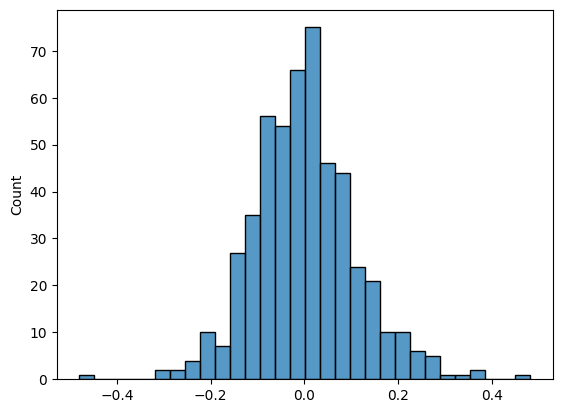

In [913]:
sns.histplot(residual)

Test data transformation

In [915]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,season_fall,season_spring,season_summer
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,1,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,0,0,1


In [916]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,season_fall,season_spring,season_summer
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.654545,0.318182,0.027273,0.245455,0.254545,0.263636
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.476601,0.466833,0.163248,0.431338,0.436599,0.441609
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [918]:
y_test=df_test.pop('cnt')
X_test=df_test

In [924]:
# add a constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,season_fall,season_spring,season_summer
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,1,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,0,0,1
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,1,0,0,0,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,0,0,1


In [928]:
X_test_sm=X_test_sm.drop(["workingday", "temp", "atemp","hum","weathersit_1"], axis=1)

In [930]:
X_test_sm.head()

,const,yr,holiday,windspeed,weathersit_2,weathersit_3,season_fall,season_spring,season_summer
184,1.0,0,1,0.084219,1,0,1,0,0
535,1.0,1,0,0.153728,0,0,0,0,1
299,1.0,0,0,0.334206,1,0,0,0,0
221,1.0,0,0,0.339570,0,0,1,0,0
152,1.0,0,0,0.537414,0,0,0,0,1


In [932]:
#predict
y_test_pred=lr.predict(X_test_sm)

Evaluate

In [936]:
r2_score(y_true=y_test , y_pred=y_test_pred)

0.7375854597361913